<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(256, 256)


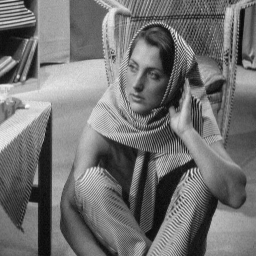

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv2.imread("/content/barbara.jpg", 0)
img1 = cv2.resize(img1, (256, 256), interpolation= cv2.INTER_LINEAR)
cv2_imshow(img1)


In [3]:
def DFT_1D(fx):
    fx = np.asarray(fx, dtype=complex)
    M = fx.shape[0]
    fu = fx.copy()

    for i in range(M):
        u = i
        sum = 0
        for j in range(M):
            x = j
            tmp = fx[x]*np.exp(-2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        # print(sum)
        fu[u] = sum
    # print(fu)

    return fu


def DFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = DFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = DFT_1D(fx[:, i])


    elif len(fu.shape) == 3:
        for ch in range(3):
            fx[:, :, ch] = DFT_2D(fu[:, :, ch])

    #fx = np.real(fx)
    return fx

In [4]:
def inverseDFT_1D(fu):
    fu = np.asarray(fu, dtype=complex)
    M = fu.shape[0]
    fx = np.zeros(M, dtype=complex)

    for i in range(M):
        x = i
        sum = 0
        for j in range(M):
            u = j
            tmp = fu[u]*np.exp(2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        fx[x] = np.divide(sum, M, dtype=complex)

    return fx

def inverseDFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = inverseDFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = inverseDFT_1D(fx[:, i])

    elif len(fu.shape) == 3:
        for ch in range(3):
            fx[:, :, ch] = inverseDFT_2D(fu[:, :, ch])


    #fx = np.real(fx)
    return fx

In [5]:
fx = DFT_2D(img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


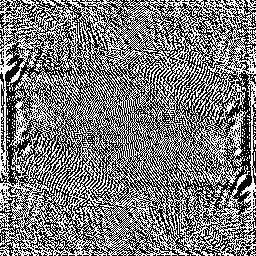

In [6]:
cv2_imshow(fx)

In [7]:
def shift(F):
    ''' this shifts the centre of FFT of images/2-d signals'''
    M, N = F.shape[:2]
    R1, R2 = F[0: M//2, 0: N//2], F[M//2: M, 0: N//2]
    R3, R4 = F[0: M//2, N//2: N], F[M//2: M, N//2: N]
    print(R1.shape, R2.shape, R3.shape, R4.shape)
    sF = np.zeros(F.shape,dtype = F.dtype)
    sF[M//2: M, N//2: N], sF[0: M//2, 0: N//2] = R1, R4
    sF[M//2: M, 0: N//2], sF[0: M//2, N//2: N]= R3, R2
    return sF

(128, 128) (128, 128) (128, 128) (128, 128)


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


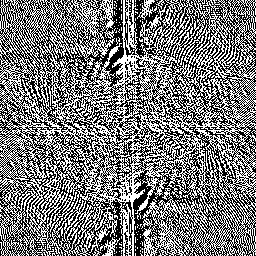

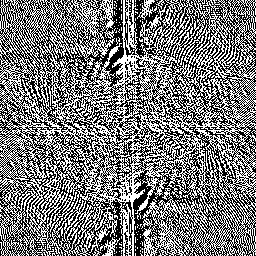

In [8]:
sF = shift(fx)
cv2_imshow(sF)
dft_shift = np.fft.fftshift(fx)
cv2_imshow(dft_shift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


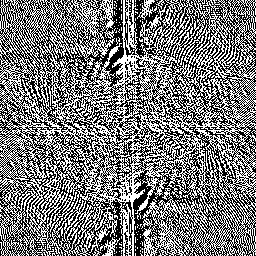

In [9]:
cv2_imshow(sF)

In [10]:
sF.shape

(256, 256)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


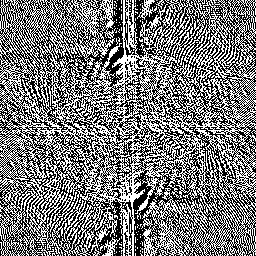

In [11]:
dft_shift = np.fft.fftshift(fx)
cv2_imshow(dft_shift)

In [12]:
rows, cols = img1.shape[:2]
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


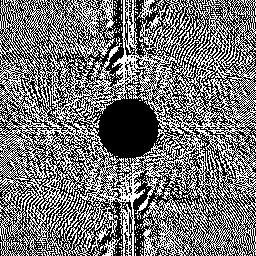

In [13]:
fshift = sF * mask
cv2_imshow(fshift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


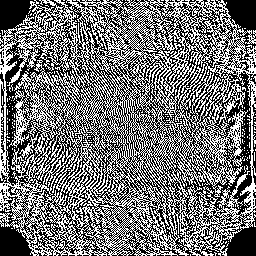

In [14]:
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)
imgg = inverseDFT_2D(f_ishift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


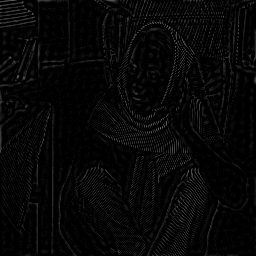

In [15]:
cv2_imshow(imgg)

In [16]:
rows, cols = img.shape[:2]
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


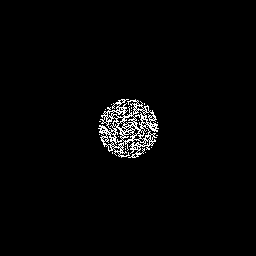

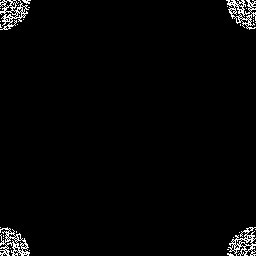

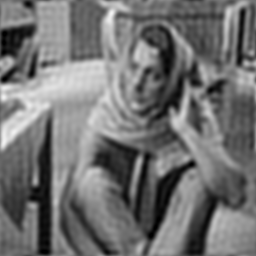

In [17]:
fshift = sF * mask
cv2_imshow(fshift)
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)
imgg = inverseDFT_2D(f_ishift)
cv2_imshow(imgg)

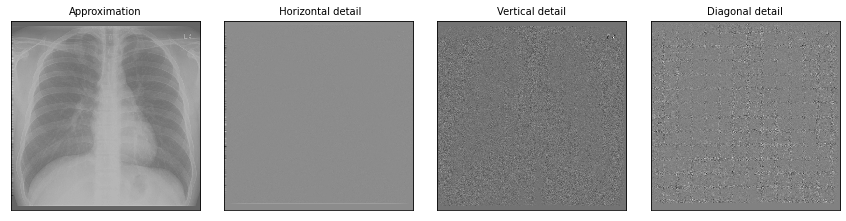

In [97]:
import pywt

img2 =  cv2.imread("/content/normal-frontal-chest-x-ray.jpg", 0)
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
(cA, cD) = pywt.dwt2(img2, 'db15', 'smooth')
LL, (LH, HL, HH) = (cA, cD)
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

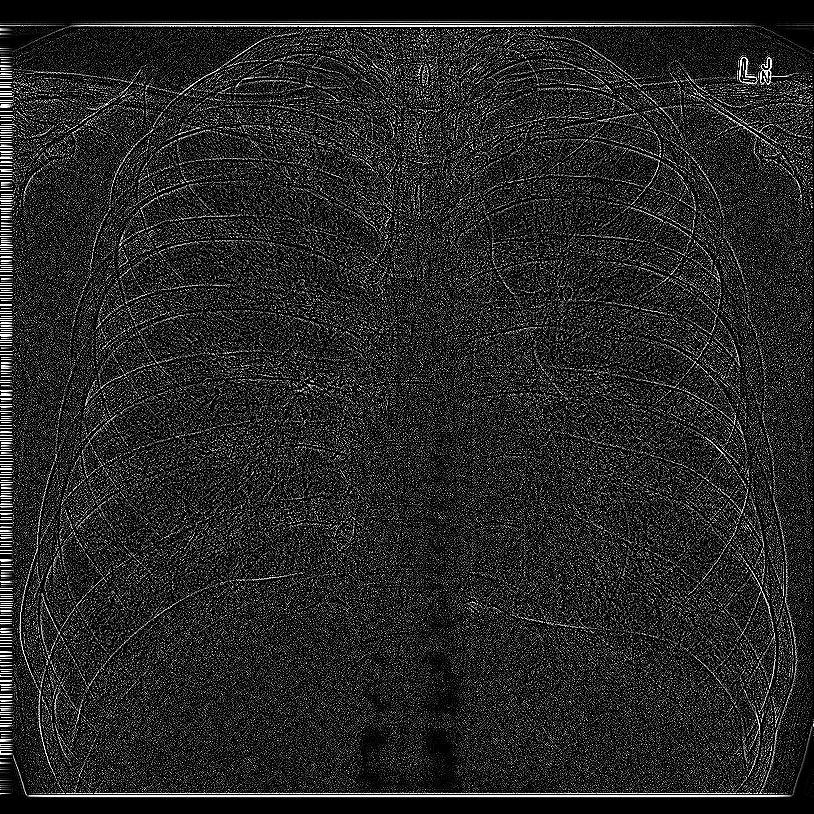

In [134]:
laplacian = np.array((
	[0, 4, 0],
	[4, -16, 4],
	[0, 4, 0]), dtype="int")

def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)

    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

LL1 = convolve2d(LL, laplacian)
cv2_imshow(LL1)

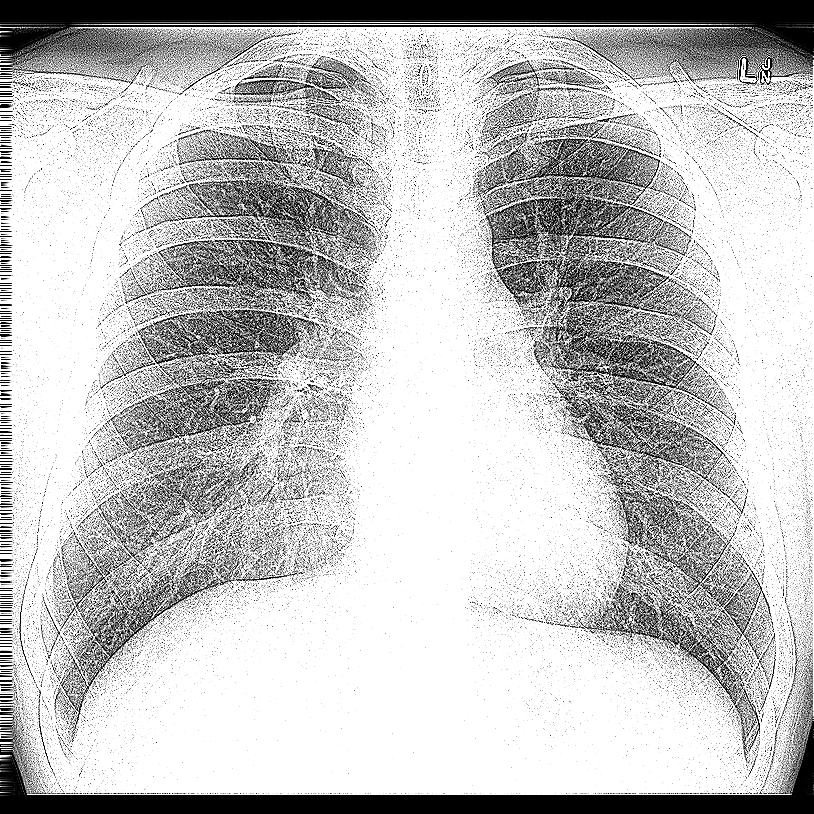

In [135]:
LL2 = LL - LL1
cv2_imshow(LL2)

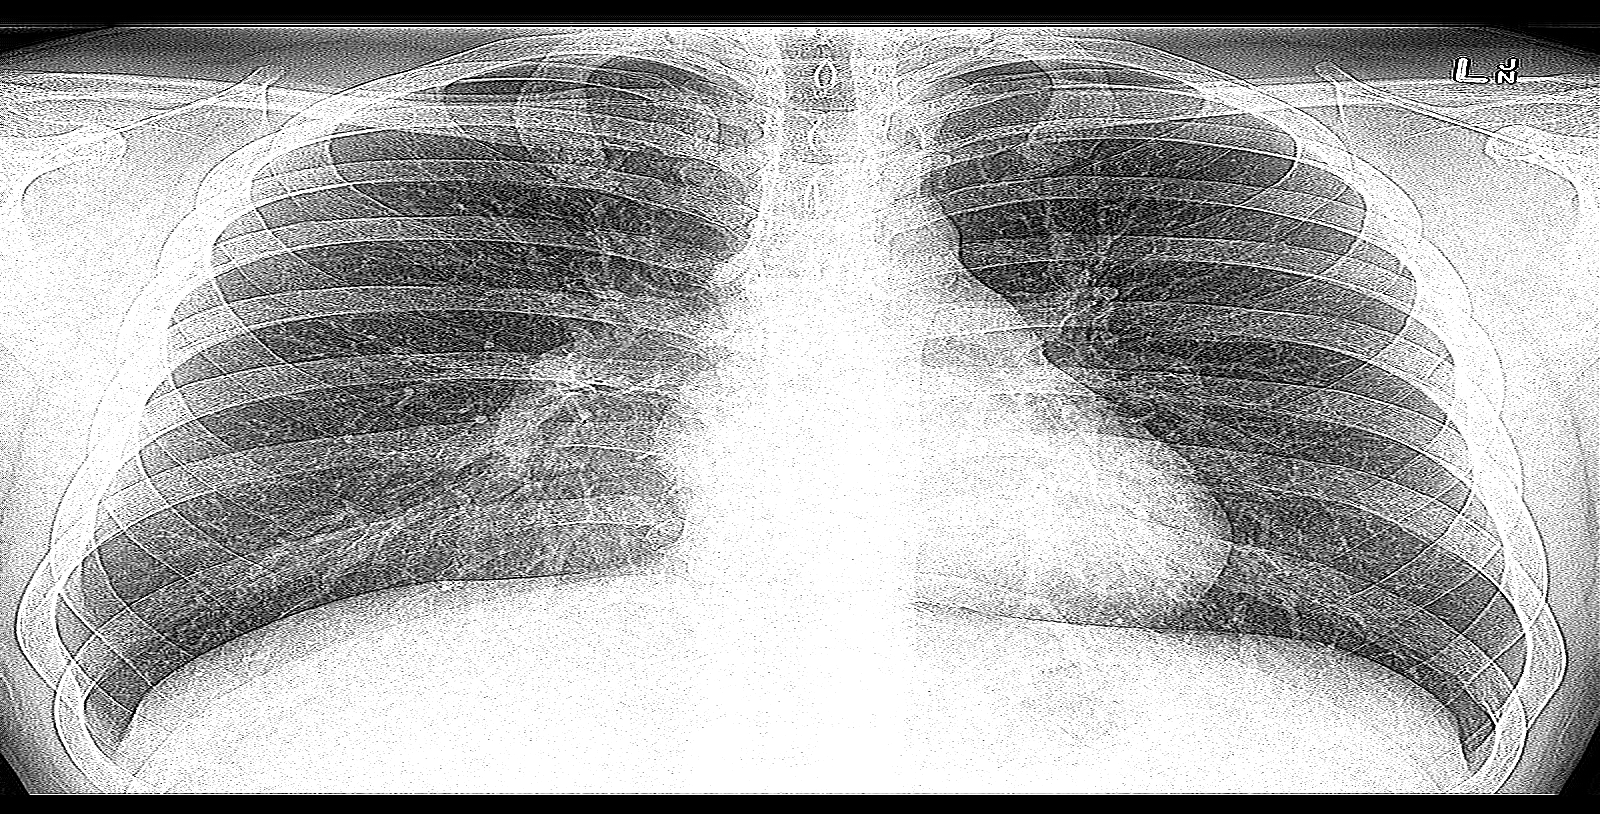

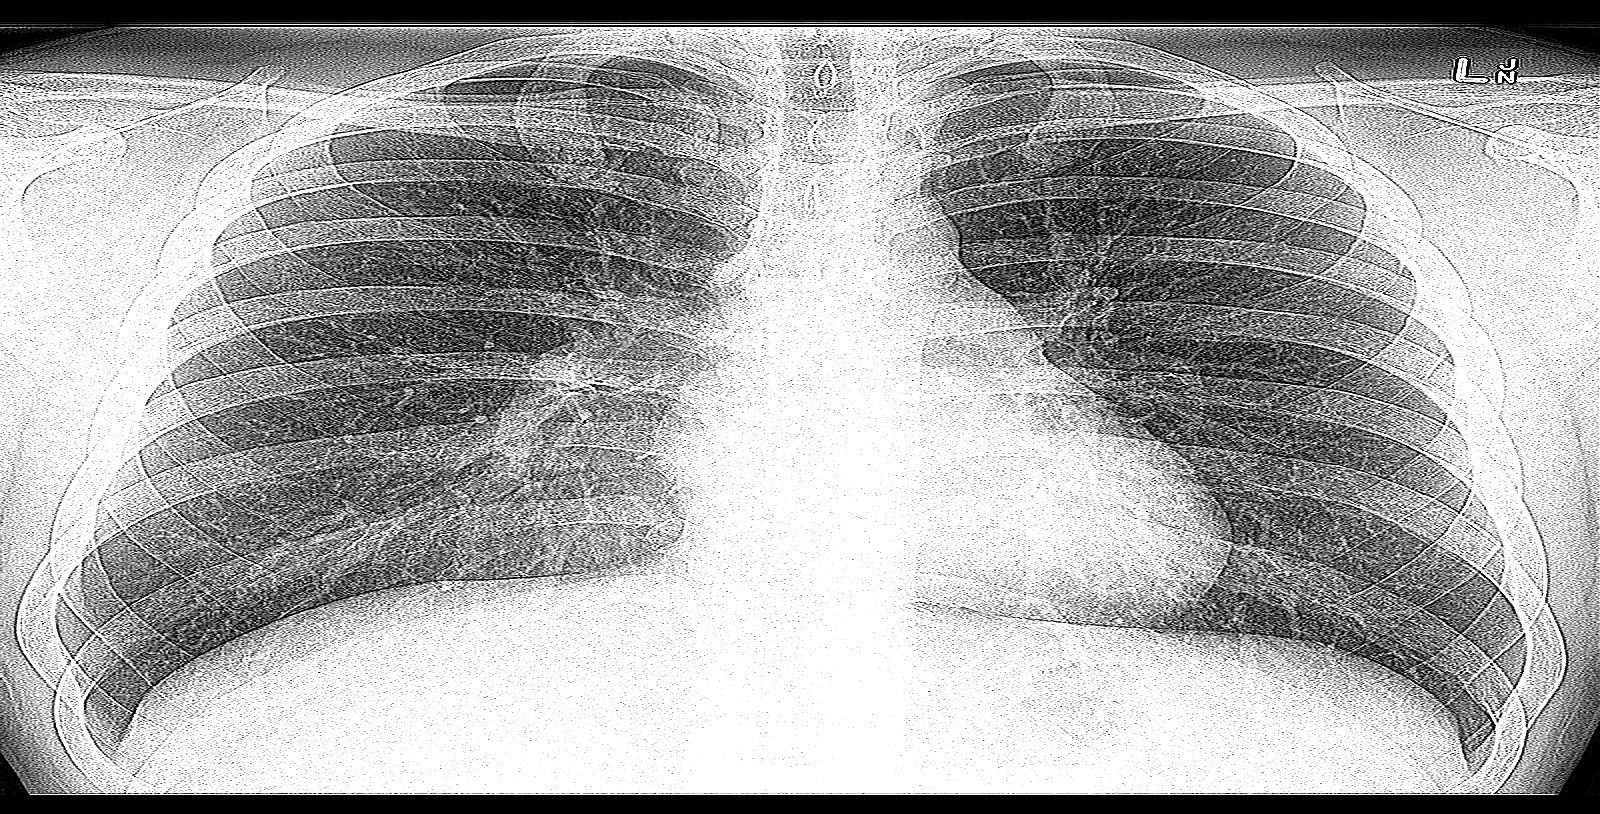

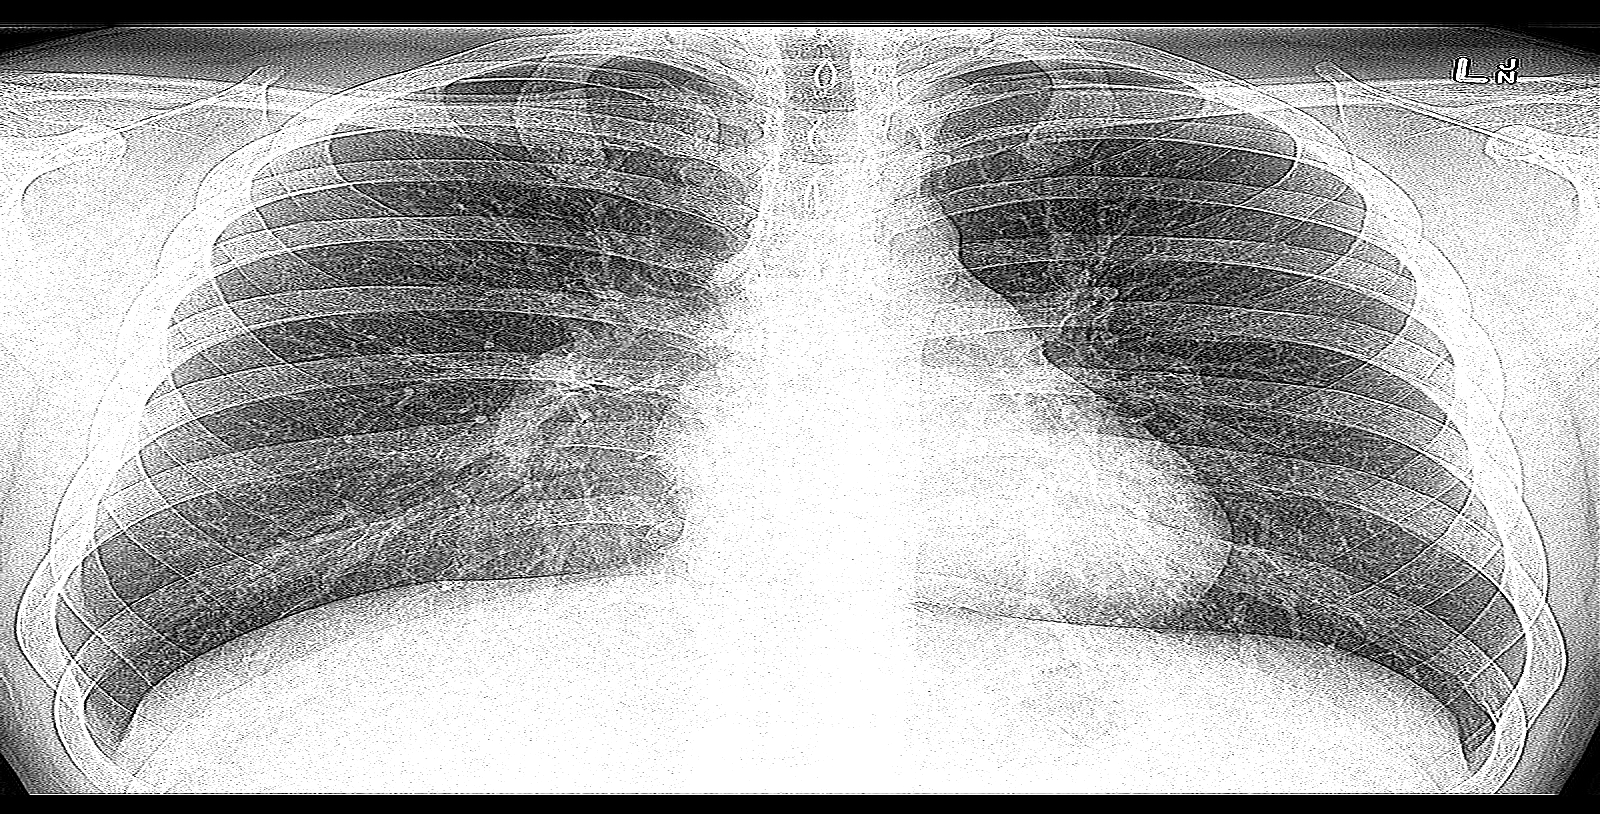

In [137]:
#LL = cv2.resize(LL1, (1600, 1600), interpolation= cv2.INTER_CUBIC)
#LH = cv2.resize(LH, (1600, 1600), interpolation= cv2.INTER_CUBIC)
#HL = cv2.resize(HL, (1600, 1600), interpolation= cv2.INTER_CUBIC)
#HH = cv2.resize(HH, (1600, 1600), interpolation= cv2.INTER_CUBIC)
for a in [LH, HL, HH]:
  
  img3 = pywt.idwt(LL2, a, 'db15', 'smooth')
  cv2_imshow(img3)
